In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualization
import seaborn as sns
from sklearn.linear_model import LinearRegression




In [30]:
#lOADING THE DATASET
df = pd.read_csv('C:/Users/JIMOUH/Desktop/FIFA20/players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [31]:
#Overview of columns
df.columns


Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

In [32]:
#Specify columns of interest
skill_fk_accuracy = df[['skill_fk_accuracy']]
mentality_penalties = df[['mentality_penalties']]

In [33]:
df_new = pd.concat([skill_fk_accuracy,mentality_penalties], axis = 1).dropna()
df_new.head()

,skill_fk_accuracy,mentality_penalties
0,94,75
1,76,85
2,87,90
3,14,11
4,79,88


<AxesSubplot:xlabel='skill_fk_accuracy'>

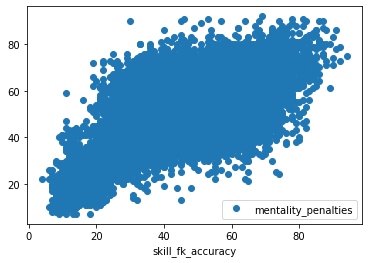

In [34]:
df_new.plot(x='skill_fk_accuracy', y='mentality_penalties', style='o')


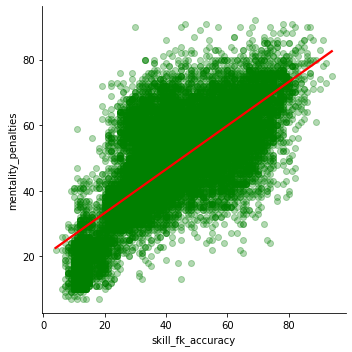

In [35]:
sns.lmplot(x='skill_fk_accuracy', y='mentality_penalties', data = df_new, scatter_kws = {'alpha':0.3,'color':'green'},
           line_kws={'color':'red'})
#We can visually conclude that there is a positive correlation between the two variables.

In [43]:
#Preparing the variables for the simple regression model
x=df_new.skill_fk_accuracy.values.reshape(-1,1)
y=df_new.mentality_penalties.values

In [44]:
x

array([[94],
       [76],
       [87],
       ...,
       [32],
       [39],
       [35]], dtype=int64)

In [45]:
y

array([75, 85, 90, ..., 36, 36, 38], dtype=int64)

In [46]:
simple_linear_regression = LinearRegression()
simple_linear_regression.fit(x,y)

LinearRegression()

In [52]:
# predict
print(simple_linear_regression.predict(np.array([[94]])))

[82.57615819]


In [53]:
print(simple_linear_regression.predict(np.array([[60]])))

[59.91033704]


In [54]:
print(simple_linear_regression.predict(np.array([[30]])))

[39.91108309]
